In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# ===============================
# Colab One-Click 4-bit Setup (Python 3.12 compatible)
# ===============================

import os
import torch

print(f"🔍 Detected Torch version: {torch.__version__}")
print(f"🔍 Detected CUDA version: {torch.version.cuda}")

# Step 1: Clean old installs (if any)
os.system("pip uninstall -y bitsandbytes transformers accelerate triton numpy")

# Step 2: Install latest compatible stack for Python 3.12
os.system("pip install --upgrade --force-reinstall numpy transformers accelerate bitsandbytes triton")

# Step 3: Verify bitsandbytes installation
os.system("python -m bitsandbytes")

# Step 4: Ready-to-use 4-bit Quantization Config
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
)

print("✅ Quantization config (4-bit) is ready to use!")

# Optional: HuggingFace authentication
# HF_TOKEN = os.environ.get("HF_TOKEN")
# if HF_TOKEN:
#     from huggingface_hub import login
#     login(token=HF_TOKEN)
#     print("🔑 HuggingFace authentication done!")
# else:
#     print("⚠️ No HF_TOKEN found. Public models can still be accessed.")




🔍 Detected Torch version: 2.9.0+cu126
🔍 Detected CUDA version: 12.6
✅ Quantization config (4-bit) is ready to use!


In [5]:
%%capture
#!pip install -q -U transformers==4.37.2
#!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gTTS
#!pip install triton==2.3.0
# !pip uninstall -y bitsandbytes transformers accelerate

# !pip install bitsandbytes==0.43.1
# !pip install transformers==4.42.4
# !pip install accelerate==0.33.0


# Example usage:
from transformers import pipeline
pipe = pipeline("image-to-text", model="your-model-id",
                 model_kwargs={"quantization_config": quant_config},
                 device_map="auto"
              )

In [ ]:
# quantization_config = BitsAndBytesConfig(
#     load_in_4bit=True,
#     bnb_4bit_compute_dtype=torch.float16
# )

# Ready-to-use Quantization Config (4-bit)




In [7]:
model_id = "llava-hf/llava-1.5-7b-hf"

In [16]:
# Example pipeline usage (commented, replace model_id with your model)
from transformers import pipeline
pipe = pipeline(
    "image-text-to-text",
    model=model_id,
    model_kwargs={"quantization_config": quantization_config},
    device_map="auto"
)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

Device set to use cuda:0


In [9]:
import whisper
import gradio as gr
import time
import warnings
import os
from gtts import gTTS

In [10]:
from PIL import Image

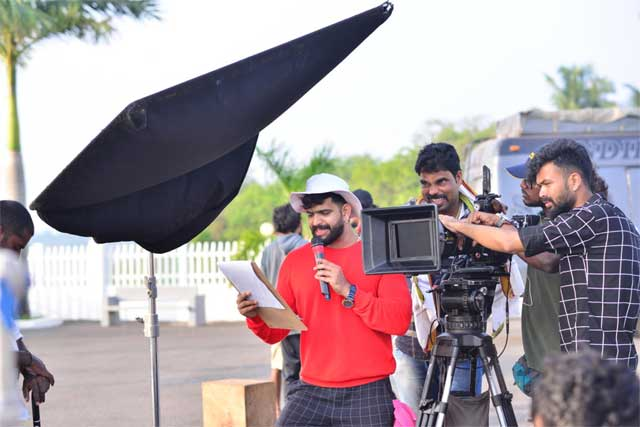

In [12]:
image_path = "/content/drive/MyDrive/Colab Notebooks/download.png"
image = Image.open((image_path))
image

In [22]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [23]:
import locale
print(locale.getlocale())  # Before running the pipeline
# Run the pipeline
print(locale.getlocale())  # After running the pipeline

('en_US', 'UTF-8')
('en_US', 'UTF-8')


In [24]:
max_new_tokens = 200

prompt_instructions = """
content:
Describe the image using as much detail as possible,
is it a painting, a photograph, what colors are predominant,
role:
what is the image about?
"""

prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"

outputs = pipe(image, text=prompt, generate_kwargs={"max_new_tokens": 200})

# outputs
# print(outputs[0]["generated_text"])
for sent in sent_tokenize(outputs[0]["generated_text"]):
    print(sent)

USER: <image>

content:
Describe the image using as much detail as possible,
is it a painting, a photograph, what colors are predominant,
role:
what is the image about?
ASSISTANT: The image features a group of people gathered around a man who is holding a microphone.
The man appears to be a filmmaker, possibly directing a scene or giving instructions to the actors.
There are several people in the scene, with some standing closer to the man with the microphone and others further away.
The setting seems to be an outdoor location, possibly a street or a park.
The people are engaged in the activity, and the atmosphere appears to be lively and collaborative.


In [25]:
warnings.filterwarnings("ignore")

In [26]:
import warnings
from gtts import gTTS
import numpy as np

In [27]:
torch.cuda.is_available()
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using torch {torch.__version__} ({DEVICE})")

Using torch 2.9.0+cu126 (cuda)


In [28]:
import whisper
model = whisper.load_model("medium", device=DEVICE)
print(
    f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
    f"and has {sum(np.prod(p.shape) for p in model.parameters()):,} parameters."
)

100%|█████████████████████████████████████| 1.42G/1.42G [00:40<00:00, 37.4MiB/s]


Model is multilingual and has 762,321,920 parameters.


In [29]:
import re

In [31]:
input_text = "What color is the microphone in image?"
input_image = '/content/drive/MyDrive/Colab Notebooks/download.png'

from PIL import Image
image = Image.open(input_image)

prompt_instructions = (
    "Act as an expert in imagery descriptive analysis. "
    "Using as much detail as possible from the image, respond to the following question:\n"
    + input_text
)

prompt = f"USER: <image>\n{prompt_instructions}\nASSISTANT:"

# ✔ IMPORTANT: Use text=prompt
outputs = pipe(
    images=image,
    text=prompt,
    generate_kwargs={"max_new_tokens": 200}
)

print("\nRaw:")
print(outputs[0]["generated_text"])

# Optional extraction
match = re.search(r'ASSISTANT:\s*(.*)', outputs[0]["generated_text"])
if match:
    print("\nExtracted:")
    print(match.group(1))




Raw:
USER: <image>
Act as an expert in imagery descriptive analysis. Using as much detail as possible from the image, respond to the following question:
What color is the microphone in image?
ASSISTANT: The microphone in the image is black.

Extracted:
The microphone in the image is black.


In [32]:
import datetime
import os

In [33]:
## Logger file
tstamp = datetime.datetime.now()
tstamp = str(tstamp).replace(' ','_')
logfile = f'{tstamp}_log.txt'
def writehistory(text):
    with open(logfile, 'a', encoding='utf-8') as f:
        f.write(text)
        f.write('\n')
    f.close()

In [34]:
import re
import requests
from PIL import Image

def img2txt(input_text, input_image):

    # load the image
    image = Image.open(input_image)

    writehistory(f"Input text: {input_text} - Type: {type(input_text)} - Dir: {dir(input_text)}")
    if type(input_text) == tuple:
        prompt_instructions = """
        Describe the image using as much detail as possible, is it a painting, a photograph, what colors are predominant, what is the image about?
        """
    else:
        prompt_instructions = """
        Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
        """ + input_text

    writehistory(f"prompt_instructions: {prompt_instructions}")
    prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"

    outputs = pipe(image, text=prompt, generate_kwargs={"max_new_tokens": 200})

    # Properly extract the response text
    if outputs is not None and len(outputs[0]["generated_text"]) > 0:
        match = re.search(r'ASSISTANT:\s*(.*)', outputs[0]["generated_text"])
        if match:
            # Extract the text after "ASSISTANT:"
            reply = match.group(1)
        else:
            reply = "No response found."
    else:
        reply = "No response generated."

    return reply

In [35]:
def transcribe(audio):

    # Check if the audio input is None or empty
    if audio is None or audio == '':
        return ('','',None)  # Return empty strings and None audio file

    # language = 'en'

    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    _, probs = model.detect_language(mel)

    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    result_text = result.text

    return result_text

In [36]:
def text_to_speech(text, file_path):
    language = 'en'

    audioobj = gTTS(text = text,
                    lang = language,
                    slow = False)

    audioobj.save(file_path)

    return file_path

In [37]:
!ffmpeg -f lavfi -i anullsrc=r=44100:cl=mono -t 10 -q:a 9 -acodec libmp3lame Temp.mp3

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
import gradio as gr
import base64
import os

# A function to handle audio and image inputs
def process_inputs(audio_path, image_path):
    # Process the audio file (assuming this is handled by a function called 'transcribe')
    speech_to_text_output = transcribe(audio_path)

    # Handle the image input
    if image_path:
        chatgpt_output = img2txt(speech_to_text_output, image_path)
    else:
        chatgpt_output = "No image provided."

    # Assuming 'transcribe' also returns the path to a processed audio file
    processed_audio_path = text_to_speech(chatgpt_output, "Temp3.mp3")  # Replace with actual path if different

    return speech_to_text_output, chatgpt_output, processed_audio_path

# Create the interface
iface = gr.Interface(
    fn=process_inputs,
    inputs=[
        gr.Audio(sources=["microphone"], type="filepath"),
        gr.Image(type="filepath")
    ],
    outputs=[
        gr.Textbox(label="Speech to Text"),
        gr.Textbox(label="ChatGPT Output"),
        gr.Audio("Temp.mp3")
    ],
    title="Learn OpenAI Whisper: Image processing with Whisper and Llava",
    description="Upload an image and interact via voice input and audio response."
)

# Launch the interface
iface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://5084211f889dc6caee.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
